In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

# 05: Composite mixing rules for thermal properties

_notebook by Nico Liebers (nico.liebers@dlr.de), Deutsches Zentrum für Luft- und Raumfahrt (DLR), 2019_


> Schürmann, Helmut (2007): _Konstruieren mit Faser-Kunststoff-Verbunden._ Springer (VDI)

### Used indexes:

- $f$ - Fiber
- $m$ - Matrix (resin)
- $tot$ - Total
- $comp$ - Composite
- $||$ - In fiber direction
- $\perp$ - Perpendicular to fiber direction

## Fiber Volume Content

Fiber volume content is defined as:

$$
\Phi = \frac{V_f}{V_f + V_m} = \frac{V_f}{V_{tot}}
$$

- $\Phi$ - Fiber volume content 
- $V_f$ - Fiber volume
- $V_m$ - Matrix (resin) volume
- $V_{tot}$ - Total volume

The fiber _mass_ content can be calculated from the fiber volume content:

$$
\psi = \frac{m_f}{m_f + m_m} = \frac{\varrho_f \phi}{\varrho_f \phi + \varrho_m (1-\phi)}
$$

- $m_i$ - Mass
- $\varrho$ - Density

### Density 

The fiber composites density can be calculated depending on the fiber volume content:

$$
\rho_{comp} = \rho_f \cdot \Phi + \rho_m \cdot (1 - \Phi)
$$

### Thermal Conductivity 
#### In Fiber Direction of a unidirectional (UD) ply
$$
k_{||} = k_{f||} \cdot \Phi + k_{m} \cdot (1 - \Phi)
$$

#### Perpenticular to Fiber Direction of UD
$$
\frac{1}{k_{\perp}} = \frac{1}{k_{f \perp}} \cdot \Phi + \frac{1}{k_{m}} \cdot (1 - \Phi)
$$

#### Transformation onto Coordinates after Rotating by Angle $\theta$
$$
k_{x} = k_{||} \cdot \cos^2 \theta + k_{\perp} \cdot \sin^2 \theta
$$
$$
k_{y} = k_{||} \cdot \sin^2 \theta + k_{\perp} \cdot \cos^2 \theta
$$

### Heat Capacity of Composite
$$
\begin{align}
c_{comp}  &= c_f \psi+ c_m (1 - \psi) \\
        &= \frac{c_f \rho_f \phi + c_m \rho_m (1 - \phi)}{\rho_f \phi + \rho_m (1 - \phi)}
\end{align}
$$

### Thermal Diffusivity

$$
\alpha = \frac{k}{\rho c_p}
$$


## Values

If not mentioned otherwise, values are taken from \[Schürmann2007\]. 

### Thermal Conductivity 

- Glass Fiber: 

    - $k_{f||} = k_{f \perp} = 1.0 \; \frac{W}{m \cdot K}$
    
    
- Carbon Fiber (HT T300): 

    - $k_{f||} = 4.9 \; \frac{W}{m \cdot K}$
    
    - $k_{f \perp} = 1.7 \; \frac{W}{m \cdot K}$
    
    
- Carbon Fiber (ST T800): 

    - $k_{f||} = 10 \; \frac{W}{m \cdot K}$
    
    - $k_{f \perp} = 1.7 \; \frac{W}{m \cdot K}$
    
    
- Carbon Fiber (HM M46J): 

    - $k_{f||} = 49.8 \; \frac{W}{m \cdot K}$


- Carbon Fiber (HM M60J): 

    - $k_{f||} = 74.8 \; \frac{W}{m \cdot K}$

    
- Epoxy Resin:

    - $k_{m}(T=50 ^\circ C) = 0.21 \; \frac{W}{m \cdot K}$ \[Hein2015\]
    

Long list of values:
[https://en.wikipedia.org/wiki/List_of_thermal_conductivities](wiki)

## Specific Heat Capacity

- Glass Fiber: 

    - $c_p = 594 \; \frac{J}{kg \cdot K}$ \[Hein2015\]


- Carbon Fiber: 

    - $c_p = 710 \; \frac{J}{kg \cdot K}$ \[TohoTenaxHTA40\]


- Epoxy Resin:

    - Strong dependency to temperature! $c_p = f(T)$
    - $c_p(T=25 ^\circ C) = 1224 \; \frac{J}{kg \cdot K}$ \[Hein2015\]

## Density

- Glass Fiber: 
    - $\varrho = 2540 \; \frac{kg}{m^3}$ 


- Carbon Fiber (HT): 
    - $\varrho = 1740 \; \frac{kg}{m^3}$ 


- Epoxy Resin: \[RTM6\]

    - uncured: $\varrho(X=0, T=25 ^\circ C) = 1110 \; \frac{kg}{m^3}$
    
    - cured: $\varrho(X=1, T=25 ^\circ C) = 1140 \; \frac{kg}{m^3}$ 


## Calculate Composite Properties
### Component Properties

> These are only exemplary properties partly from different sources!

In [2]:
# Carbon fiber example: ST T800
CF = dict(k_f_parallel=10,
          k_f_perp=1.7,
          rho_f=1700,
          c_f=710) 

# Glass fiber example
GF = dict(k_f_parallel=1,
          rho_f=2540,
          c_f=594) 
GF.update(dict(k_f_perp=GF["k_f_parallel"])) # same value

# Epoxy resin
EP = dict(k_m=.21,
          rho_m=1110,
          c_m=1224)

# calculate for these fiber volume content values
phi = np.linspace(0, 1, 501)

### Specific Heat Capacity of Composite

In [3]:
def calc_cp(material_data, phi=.5):
    """calculate combined heat capacity of composite material with fiber volume content phi"""
    c_f = material_data["c_f"]
    rho_f = material_data["rho_f"]
    c_m = material_data["c_m"]
    rho_m = material_data["rho_m"]
    c_comp = (c_f * rho_f * phi + c_m * rho_m * (1 - phi)) / (rho_f * phi + rho_m * (1 - phi))
    return c_comp


## carbon fiber
# merge both material properties
comp_material = {**CF, **EP}
# calculate specific heat capacity of composite material
c_comp_CF = calc_cp(comp_material, phi)

## glass fiber
comp_material = {**GF, **EP}
c_comp_GF = calc_cp(comp_material, phi)

plt.figure()
plt.title("Specific Heat Capacity of Composite")
plt.plot(phi, c_comp_CF, label="$c_{comp, CF}$")
plt.plot(phi, c_comp_GF, label="$c_{comp, GF}$")
plt.legend()
plt.xlabel(r"$\phi$")
plt.ylabel(r"$c_p \left[ \frac{J}{kg \cdot K} \right]$")
plt.xlim((0, 1));

<IPython.core.display.Javascript object>

### Thermal Conductivity of Composite

<IPython.core.display.Javascript object>


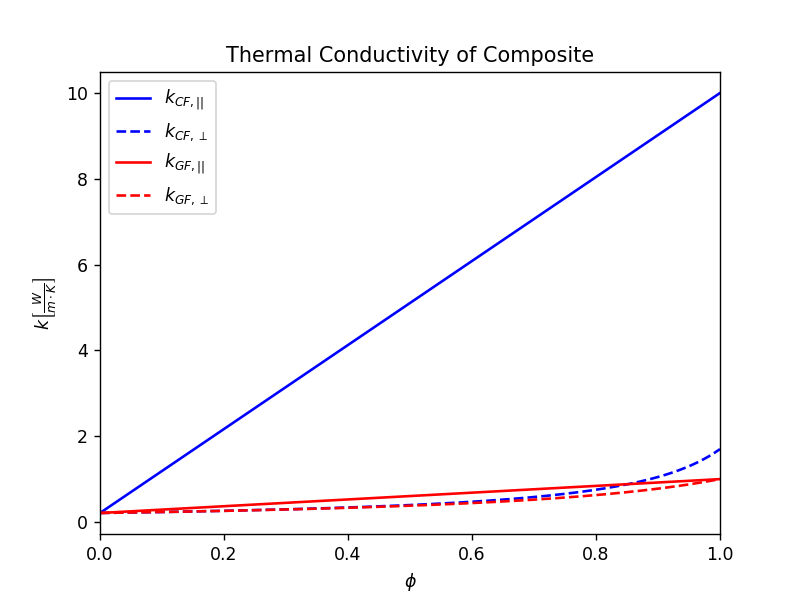

In [5]:
def calc_k(material_data, phi=.5):
    """
    calculate thermal diffusivity in and perpendicular to fiber direction of (UD) 
    composite material with fiber volume content phi
    """
    k_f_parallel = material_data["k_f_parallel"]
    k_f_perp = material_data["k_f_perp"]
    k_m = material_data["k_m"]
    
    k_parallel = k_f_parallel * phi + k_m * (1 - phi)
    k_perp = 1 / (phi / k_f_perp * phi + (1 - phi) / k_m)
    
    return k_parallel, k_perp

plt.figure()
plt.title("Thermal Conductivity of Composite")

## carbon fiber
k_parallel, k_perp  = calc_k({**CF, **EP}, phi)
plt.plot(phi, k_parallel, label=r"$k_{CF, ||}$", color="b")
plt.plot(phi, k_perp, label=r"$k_{CF, \perp}$", color="b", ls="--")

## glass fiber
k_parallel, k_perp  = calc_k({**GF, **EP}, phi)
plt.plot(phi, k_parallel, label=r"$k_{GF, ||}$", color="r")
plt.plot(phi, k_perp, label=r"$k_{GF, \perp}$", color="r", ls="--")

plt.legend()
plt.xlabel(r"$\phi$")
plt.ylabel(r"$k \left[ \frac{W}{m \cdot K} \right]$")
plt.xlim((0, 1));

### Thermal Diffusivity of Composite

<IPython.core.display.Javascript object>


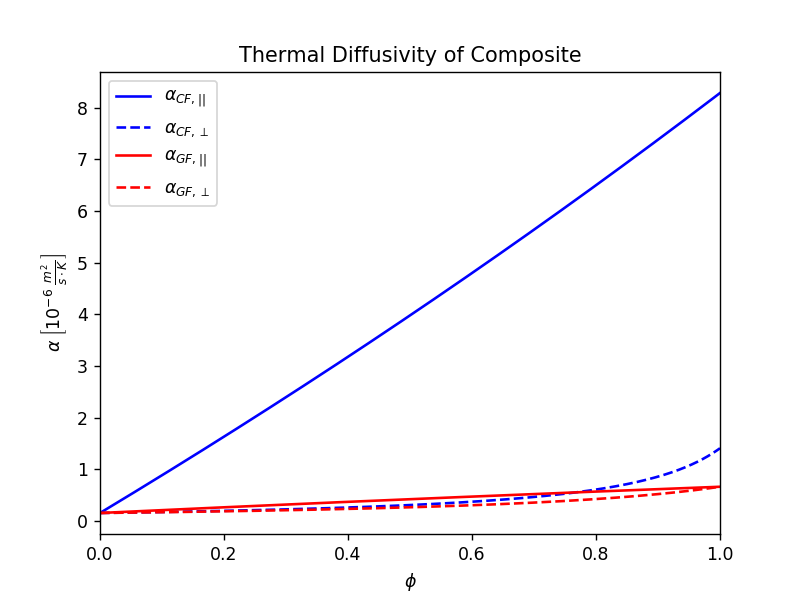

In [7]:
def calc_rho(material_data, phi=.5):
    """calculate density composite material with fiber volume content phi"""
    rho_f = material_data["rho_f"]
    rho_m = material_data["rho_m"]
    rho = rho_f * phi + rho_m * (1 - phi)
    return rho

def calc_alpha(k, rho, cp):
    """Calculate thermal diffusivity from thermal conductivity k, density rho and specific heat capacity cp"""
    return k / (rho * cp)


plt.figure()
plt.title("Thermal Diffusivity of Composite")

## carbon fiber
comp_material = {**CF, **EP}
k_parallel, k_perp  = calc_k(comp_material, phi)
rho = calc_rho(comp_material, phi)
c_comp = calc_cp(comp_material, phi)
alpha_parallel = calc_alpha(k_parallel, rho, c_comp)
alpha_perp = calc_alpha(k_perp, rho, c_comp)
plt.plot(phi, alpha_parallel*1e6, label=r"$\alpha_{CF, ||}$", color="b")
plt.plot(phi, alpha_perp*1e6, label=r"$\alpha_{CF, \perp}$", color="b", ls="--")

## glass fiber
comp_material = {**GF, **EP}
k_parallel, k_perp  = calc_k(comp_material, phi)
rho = calc_rho(comp_material, phi)
c_comp = calc_cp(comp_material, phi)
alpha_parallel = calc_alpha(k_parallel, rho, c_comp)
alpha_perp = calc_alpha(k_perp, rho, c_comp)
plt.plot(phi, alpha_parallel*1e6, label=r"$\alpha_{GF, ||}$", color="r")
plt.plot(phi, alpha_perp*1e6, label=r"$\alpha_{GF, \perp}$", color="r", ls="--")

plt.legend()
plt.xlabel(r"$\phi$")
plt.ylabel(r"$\alpha \; \left[10^{-6} \; \frac{m^2}{s \cdot K} \right]$")
plt.xlim((0, 1));

<IPython.core.display.Javascript object>


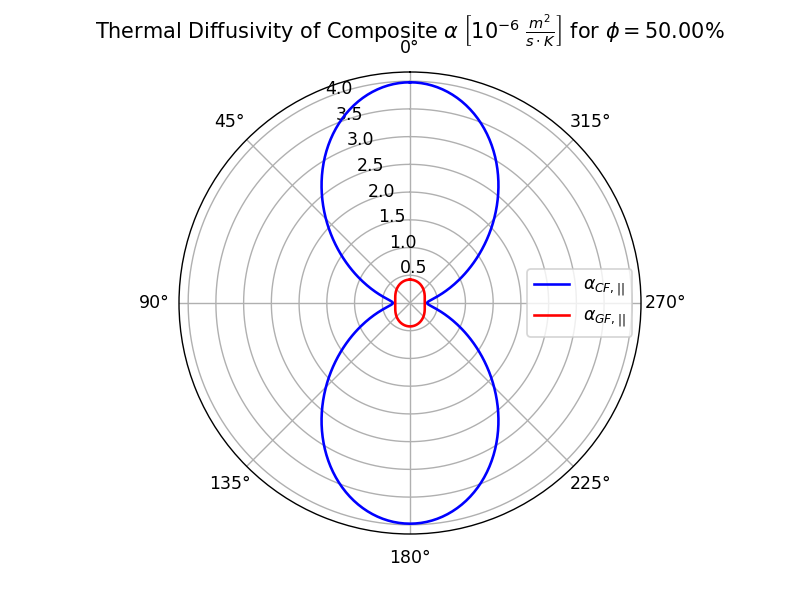

In [20]:
# calculate polar plot for one fiber volume content
phi = .5

theta = np.linspace(0, 2*np.pi, 501) #/ 180 * np.pi

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection="polar")
ax.set_theta_zero_location("N")
plt.title(r"Thermal Diffusivity of Composite $\alpha \; \left[10^{-6} \; \frac{m^2}{s \cdot K} \right]$ for $\phi = %.2f \%%$" %(phi*100))

## carbon fiber
comp_material = {**CF, **EP}
k_parallel, k_perp  = calc_k(comp_material, phi)
rho = calc_rho(comp_material, phi)
c_comp = calc_cp(comp_material, phi)

k_x = k_parallel * np.cos(theta)**2 + k_perp * np.sin(theta)**2 

alpha_x = calc_alpha(k_x, rho, c_comp)

plt.plot(theta, alpha_x*1e6, label=r"$\alpha_{CF, ||}$", color="b")

## glass fiber
comp_material = {**GF, **EP}
k_parallel, k_perp  = calc_k(comp_material, phi)
rho = calc_rho(comp_material, phi)
c_comp = calc_cp(comp_material, phi)

k_x = k_parallel * np.cos(theta)**2 + k_perp * np.sin(theta)**2 

alpha_x = calc_alpha(k_x, rho, c_comp)

plt.plot(theta, alpha_x*1e6, label=r"$\alpha_{GF, ||}$", color="r")

plt.legend(loc="center right");